In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from scipy import stats
SEED=4242
rnd.seed(10)
SIZE=30000
ALPHA=0.03
from IPython.display import clear_output

In [2]:
df= pd.read_csv('/content/DFORE450.zip', compression='zip', low_memory=True, index_col='email_address')

AvgDaysBetweenVends',

WalletLoad_Recency',

Vend_Recency',

Vend_DaysonBook',

WalletLoad_DaysonBook',

Vend_FrequencyLast180Days',

WalletLoadAmountLast180Days',

BonusAmountLast180Days',

Industry',

ConsumerAge

ConsumerGender

COMPUTERS_INTERNET',

PERSONA_EMPLOYMENT',

SHOPPING_CLOTHING',

SHOPPING_HOMEANDGARDEN'

In [3]:
df.drop_duplicates(keep='last', inplace= True)

In [4]:
df['Age']= 2020- df['birth_year']

In [5]:
df.Age.fillna(df.Age.median(), inplace= True)

In [6]:
df.Age.isna().sum()

0

In [7]:
df.gender.fillna(df.gender.mode()[0], inplace=True)

In [8]:
rfmcols= ['AvgDaysBetweenVends', 'WalletLoad_Recency', 'Vend_Recency', 'Vend_DaysonBook', 'WalletLoad_DaysonBook', \
          'Vend_FrequencyLast180Days', 'WalletLoadAmountLast180Days']

In [9]:
print(df.shape)
for r in rfmcols:
  p5= df[r].quantile(.01)
  p95= df[r].quantile(.99)
  df[r] = np.where(df[r] <p5, p5,df[r])
  df[r] = np.where(df[r] >p95, p95,df[r])
  # df= df.loc[df.loc[:, r].between(p5, p95)]
print(df.shape)

(79323, 669)
(79323, 669)


In [10]:
for s in ['COMPUTERS_INTERNET', 'SHOPPING_CLOTHING', 'SHOPPING_HOMEANDGARDEN']:
  subslct= list(filter(lambda x: s in x, df.columns.tolist()))
  df[s]= df[subslct].fillna(0).sum(axis=1)

In [11]:
# list(filter(lambda x: 'PERSONA_EMPLOYMENT' in x, df.columns.tolist()))

In [12]:
df['MaxDaysonBooks']= df[['Vend_DaysonBook', 'WalletLoad_DaysonBook']].max(axis=1)

In [13]:
df['MostRecent']= df[['WalletLoad_Recency', 'Vend_Recency']].max(axis=1)

In [14]:
finCols= ['AvgDaysBetweenVends', 'MaxDaysonBooks', 'MostRecent', 'Vend_FrequencyLast180Days', 'WalletLoadAmountLast180Days', 'Age', 'gender',\
          'COMPUTERS_INTERNET', 'SHOPPING_CLOTHING', 'SHOPPING_HOMEANDGARDEN']

In [15]:
df1= df[finCols]

In [16]:
df1.dropna(inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
df1.isnull().sum()

AvgDaysBetweenVends            0
MaxDaysonBooks                 0
MostRecent                     0
Vend_FrequencyLast180Days      0
WalletLoadAmountLast180Days    0
Age                            0
gender                         0
COMPUTERS_INTERNET             0
SHOPPING_CLOTHING              0
SHOPPING_HOMEANDGARDEN         0
dtype: int64

In [18]:
df1.dtypes

AvgDaysBetweenVends            float64
MaxDaysonBooks                 float64
MostRecent                     float64
Vend_FrequencyLast180Days      float64
WalletLoadAmountLast180Days    float64
Age                            float64
gender                          object
COMPUTERS_INTERNET             float64
SHOPPING_CLOTHING              float64
SHOPPING_HOMEANDGARDEN         float64
dtype: object

In [19]:
df1= pd.get_dummies(df1, columns=['gender'])

In [20]:
df1=df1[[	'AvgDaysBetweenVends', 'MaxDaysonBooks', 'MostRecent', 'Vend_FrequencyLast180Days', 'WalletLoadAmountLast180Days',\
     'Age', 'COMPUTERS_INTERNET', 'SHOPPING_CLOTHING', 'SHOPPING_HOMEANDGARDEN', 'gender_F']]

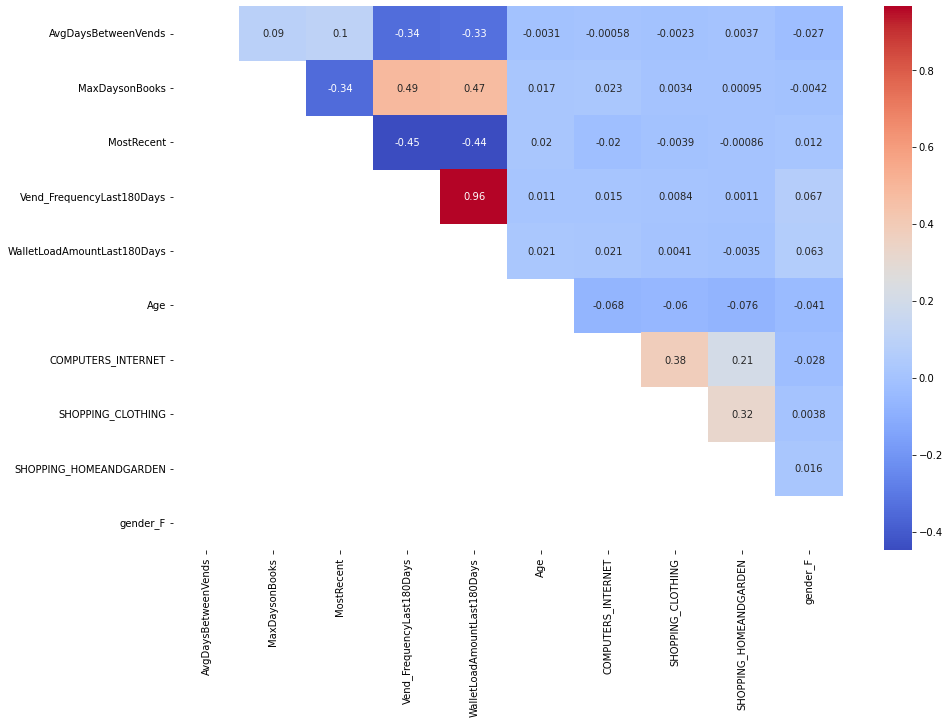

In [21]:
plt.figure(figsize = (15,10))
mask = np.tril(np.ones_like(df1.corr()))
sns.heatmap(df1.corr(), fmt='.2g',cmap='coolwarm', annot= True, mask=mask)

In [22]:
mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)

In [23]:
idx= [i for i,v in enumerate(data_transformed[0:].tolist())]

In [24]:
idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [ ]:
qseries= np.zeros(len(df1))
for c in df1.columns.tolist():
  qseries= qseries+ pd.qcut(df1[c], 5, labels=False, duplicates= 'drop').values+1
  print(c)

AvgDaysBetweenVends
MaxDaysonBooks
MostRecent
Vend_FrequencyLast180Days
WalletLoadAmountLast180Days
Age
COMPUTERS_INTERNET
SHOPPING_CLOTHING
SHOPPING_HOMEANDGARDEN
gender_F


In [ ]:
train, test, idx_train, idx_test = train_test_split(data_transformed, idx, test_size=0.2, shuffle= True, random_state=4242, stratify= qseries)

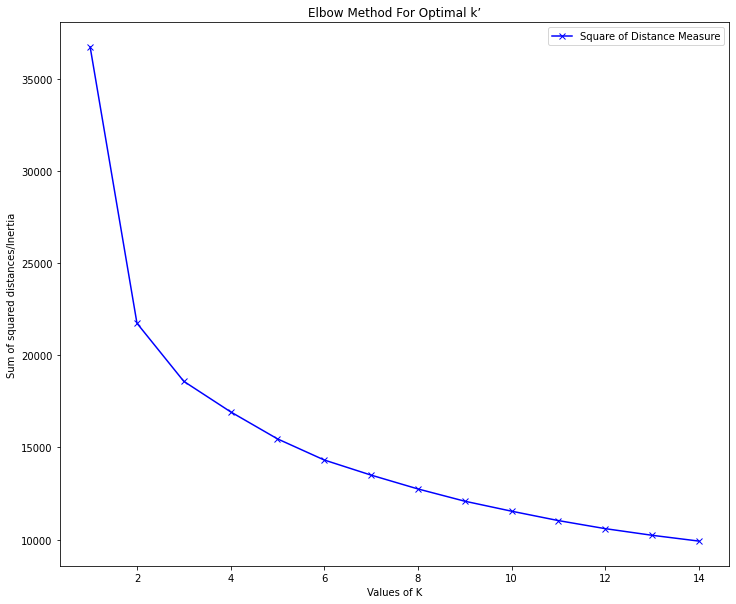

In [ ]:
Sum_of_squared_distances = []
plt.figure(figsize=(12,10))
K = range(1,15)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(train)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-', label= 'Square of Distance Measure')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.legend()
plt.title('Elbow Method For Optimal k’')
plt.show()

In [ ]:
range_n_clusters = range(3,10)
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(train)
 cluster_labels = kmeans.labels_
 # silhouette score
 silhouette_avg.append(silhouette_score(train, cluster_labels))
 clear_output(wait=True)
 print('Calculated for ', num_clusters)

Calculated for  9


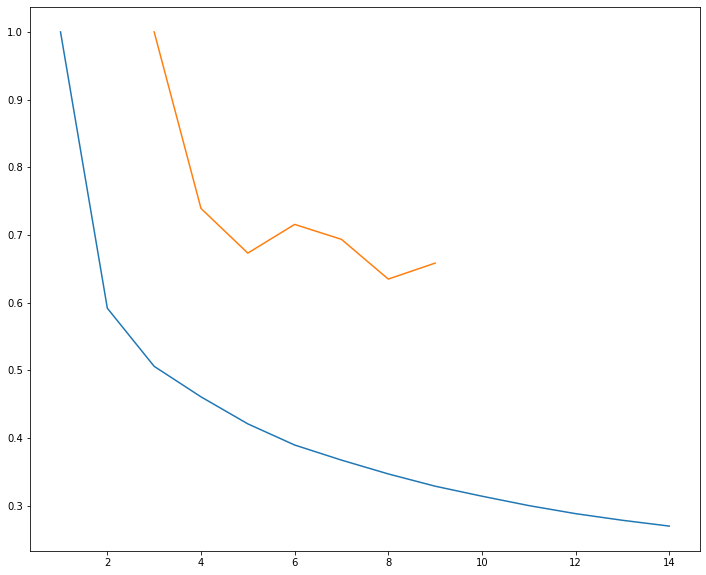

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(K,np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0])
plt.plot(range_n_clusters,np.array(silhouette_avg)/silhouette_avg[0])

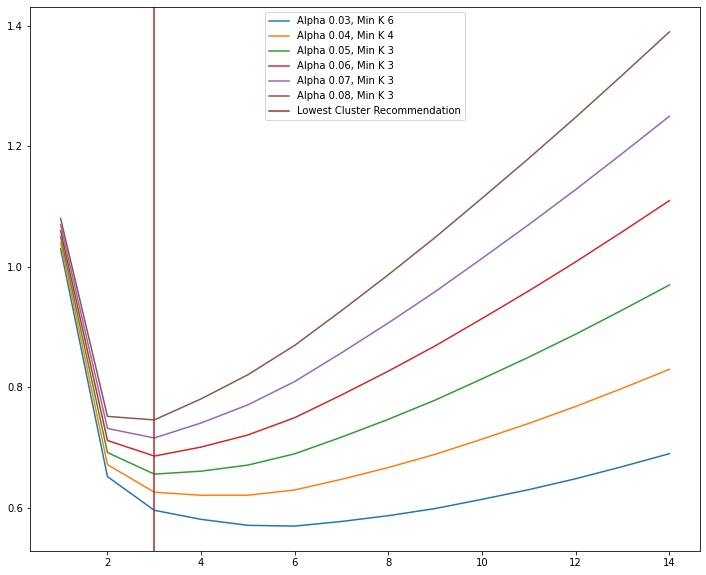

In [ ]:
lminIdx=99999
plt.figure(figsize=(12,10))
for a in [.03,.040,.05,.06,.07, .08]:
  modified_intertia= np.array(Sum_of_squared_distances)/ Sum_of_squared_distances[0]+a*np.array([i+1 for i in range(len(Sum_of_squared_distances))])
  minIdx= np.argmin(modified_intertia)
  if lminIdx > minIdx:
    lminIdx= minIdx+1
  plt.plot(K, modified_intertia, label='Alpha {}, Min K {}'.format(a, minIdx+1))
plt.axvline(lminIdx, label= 'Lowest Cluster Recommendation', color= 'brown')
plt.legend()

In [ ]:
lminIdx

3

In [ ]:
pca = PCA(n_components=2)
pca.fit(train)

PCA(n_components=2)

In [ ]:
km = KMeans(n_clusters=4)
km = km.fit(train)
tr_cluster_labels = km.labels_

In [ ]:
df3= pd.DataFrame(pca.fit_transform(train))
df3.columns= ['PCA_1', 'PCA_2']

In [ ]:
df3['cluster']= tr_cluster_labels

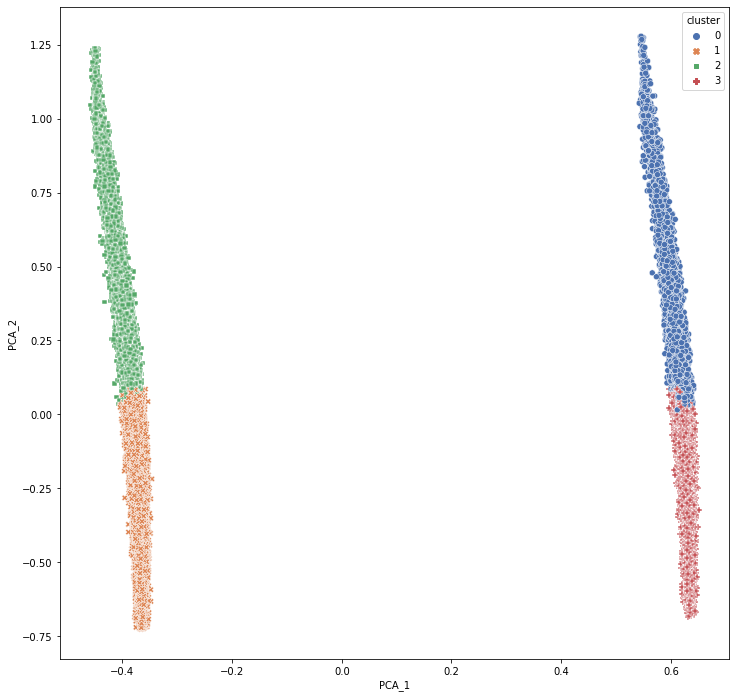

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df3, x="PCA_1", y="PCA_2", hue="cluster", style= 'cluster', palette="deep")

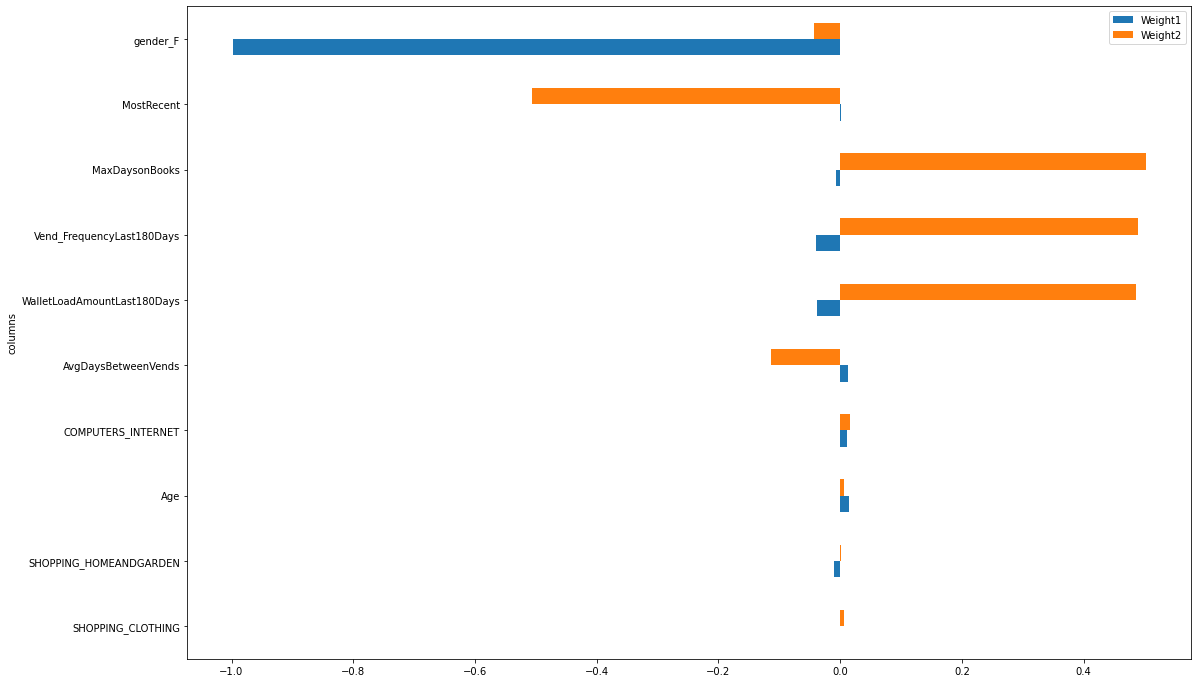

In [ ]:
weights = pca.components_
df4=pd.DataFrame({
    'columns': list(df1.columns),
    'Weight1': list(weights[0]),
    'Weight2': list(weights[1])
})
df4['norm']= np.sqrt(df4.Weight1**2+ df4.Weight2**2)
df4.sort_values(by='norm', inplace= True, ascending= False)

# plt.figure(figsize=(18,12))
df4.sort_values('norm', ascending=True).plot(x="columns", y=["Weight1", "Weight2"], kind="barh", figsize=(18,12))

Text(0, 0.5, 'PC 1')

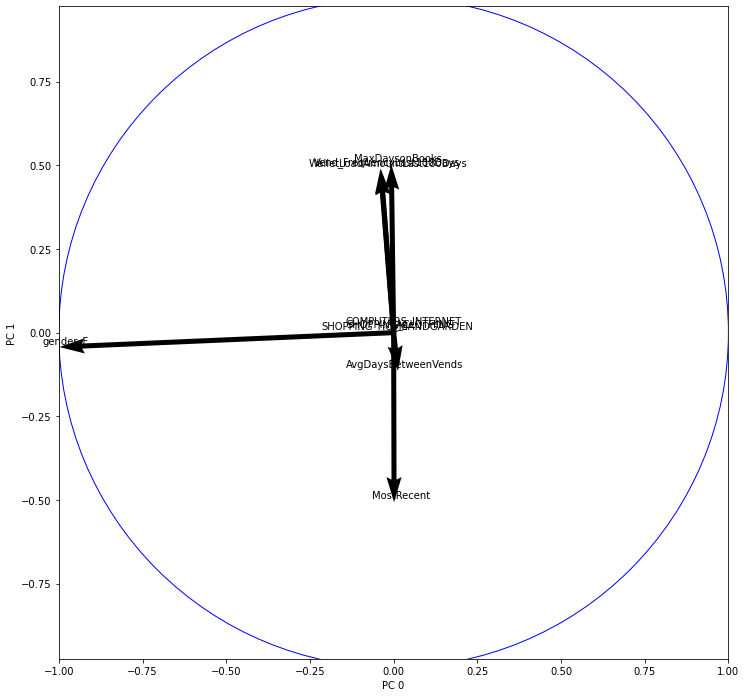

In [ ]:
PCs = pca.components_

# Use quiver to generate the basic plot
fig = plt.figure(figsize=(12,12))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = df1.columns.tolist()
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

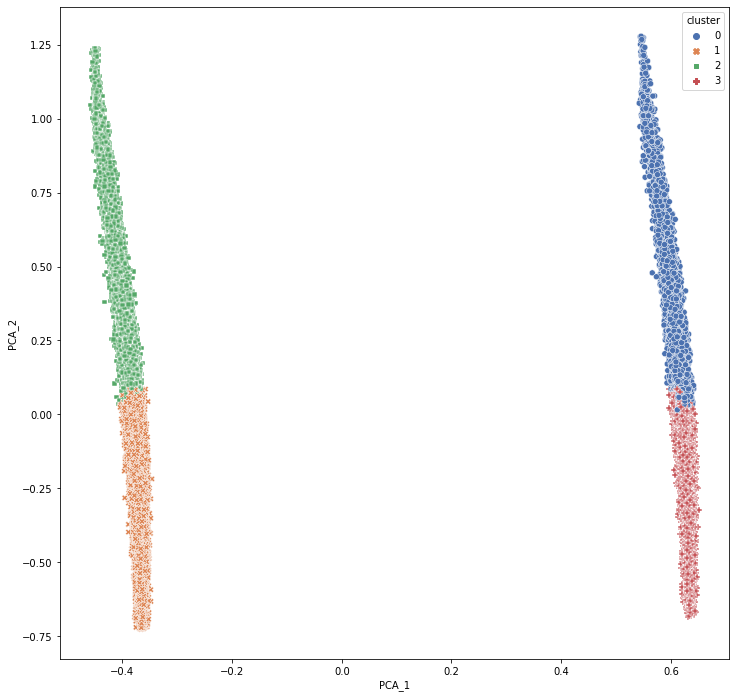

In [ ]:
te_cluster_labels= km.fit_predict(test)
df4= pd.DataFrame(pca.fit_transform(test))
df4.columns= ['PCA_1', 'PCA_2']
df4['cluster']= te_cluster_labels
plt.figure(figsize=(12,12))
sns.scatterplot(data=df3, x="PCA_1", y="PCA_2", hue="cluster", style= 'cluster', palette="deep")

In [ ]:
df1.shape

(79289, 10)

In [ ]:
df1['cluster']= -9999
df1['flag']= 'NA'


In [ ]:
df1.shape

(79289, 12)

In [ ]:
df1.iloc[idx_train,10]= tr_cluster_labels
df1.iloc[idx_train,11]= 'train'
df1.iloc[idx_test,10]= te_cluster_labels
df1.iloc[idx_test,11]= 'test'
pd.crosstab(df1.flag, df1.cluster, normalize='index')
df4= df1.groupby(['flag', 'cluster']).describe()

In [ ]:
gcols= ['AvgDaysBetweenVends', 'MaxDaysonBooks', 'MostRecent',
       'Vend_FrequencyLast180Days', 'WalletLoadAmountLast180Days', 'Age',
       'COMPUTERS_INTERNET', 'SHOPPING_CLOTHING', 'SHOPPING_HOMEANDGARDEN',
       'gender_F']

In [ ]:
df1.loc[(df1.flag=='train') & (df1.cluster== c1), c].values

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
df1.loc[(df1.flag=='train') & (df1.cluster== c2), c].values

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
recs=[]
for col in gcols:
  for c1 in df1.cluster.unique():
    for c2 in df1.cluster.unique():
      if c1 != c2:
        sz1= df1.loc[df1.flag=='train'].groupby('cluster')[gcols].describe().T.loc[(col, 'count')][c1]
        m1= df1.loc[df1.flag=='train'].groupby('cluster')[gcols].describe().T.loc[(col, 'mean')][c1]
        s1= df1.loc[df1.flag=='train'].groupby('cluster')[gcols].describe().T.loc[(col, 'std')][c1]**2
        sz2= df1.loc[df1.flag=='train'].groupby('cluster')[gcols].describe().T.loc[(col, 'count')][c2]
        m2= df1.loc[df1.flag=='train'].groupby('cluster')[gcols].describe().T.loc[(col, 'mean')][c2]
        s2= df1.loc[df1.flag=='train'].groupby('cluster')[gcols].describe().T.loc[(col, 'std')][c2]**2
        t, p = stats.ttest_ind(df1.loc[(df1.flag=='train') & (df1.cluster== c1), c].values, df1.loc[(df1.flag=='train') & (df1.cluster== c2), c].values, equal_var = True)
        print(col, c1,c2, round(m1,2),round(s1,2),round(m2,2),round(s2,2),round(t,2),round(p,2))
        recs.append([col, c1,c2, round(m1,2),round(s1,2),round(m2,2),round(s2,2),round(t,2),round(p,2)])
        clear_output(wait=True)

gender_F 0 2 0.0 0.0 1.0 0.0 -inf 0.0


In [ ]:
recs=[]
for c in gcols:
  sz1= df4.loc[('train', 2),(c, 'count')]
  m1= df4.loc[('train', 2),(c, 'mean')]
  s1= df4.loc[('train', 2),(c, 'std')]**2
  m2= df4.loc[('test', 2),(c, 'mean')]
  sz2= df4.loc[('test', 2),(c, 'count')]
  s2= df4.loc[('test', 2),(c, 'std')]**2
  t, p = stats.ttest_ind(df1.loc[df1.flag=='train', c].values, df1.loc[df1.flag=='test', c].values, equal_var = False)
  print(c,round(m1,2),round(s1,2),round(m2,2),round(s2,2),round(t,2),round(p,2))
  recs.append([c,round(m1,2),round(s1,2),round(m2,2),round(s2,2),round(t,2),round(p,2)])

AvgDaysBetweenVends 9.17 39.64 9.08 39.62 -1.58 0.12
MaxDaysonBooks 180.99 4451.81 182.4 4367.01 -1.21 0.22
MostRecent 25.85 432.18 25.3 385.21 0.93 0.35
Vend_FrequencyLast180Days 81.31 2159.87 82.21 2187.02 0.37 0.71
WalletLoadAmountLast180Days 126.83 5545.4 127.42 5527.83 0.86 0.39
Age 38.3 135.69 38.38 133.39 -0.06 0.95
COMPUTERS_INTERNET 15.41 152.51 15.6 159.83 -0.21 0.84
SHOPPING_CLOTHING 4.31 22.0 4.36 21.99 0.51 0.61
SHOPPING_HOMEANDGARDEN 0.85 1.24 0.85 1.24 -0.04 0.97
gender_F 1.0 0.0 1.0 0.0 1.36 0.17


In [ ]:
pd.DataFrame.from_records(recs)

,0,1,2,3,4,5,6
0,AvgDaysBetweenVends,9.17,39.64,9.08,39.62,-1.58,0.12
1,MaxDaysonBooks,180.99,4451.81,182.40,4367.01,-1.21,0.22
2,MostRecent,25.85,432.18,25.30,385.21,0.93,0.35
3,Vend_FrequencyLast180Days,81.31,2159.87,82.21,2187.02,0.37,0.71
4,WalletLoadAmountLast180Days,126.83,5545.40,127.42,5527.83,0.86,0.39
5,Age,38.30,135.69,38.38,133.39,-0.06,0.95
6,COMPUTERS_INTERNET,15.41,152.51,15.60,159.83,-0.21,0.84
7,SHOPPING_CLOTHING,4.31,22.00,4.36,21.99,0.51,0.61
8,SHOPPING_HOMEANDGARDEN,0.85,1.24,0.85,1.24,-0.04,0.97
9,gender_F,1.00,0.00,1.00,0.00,1.36,0.17


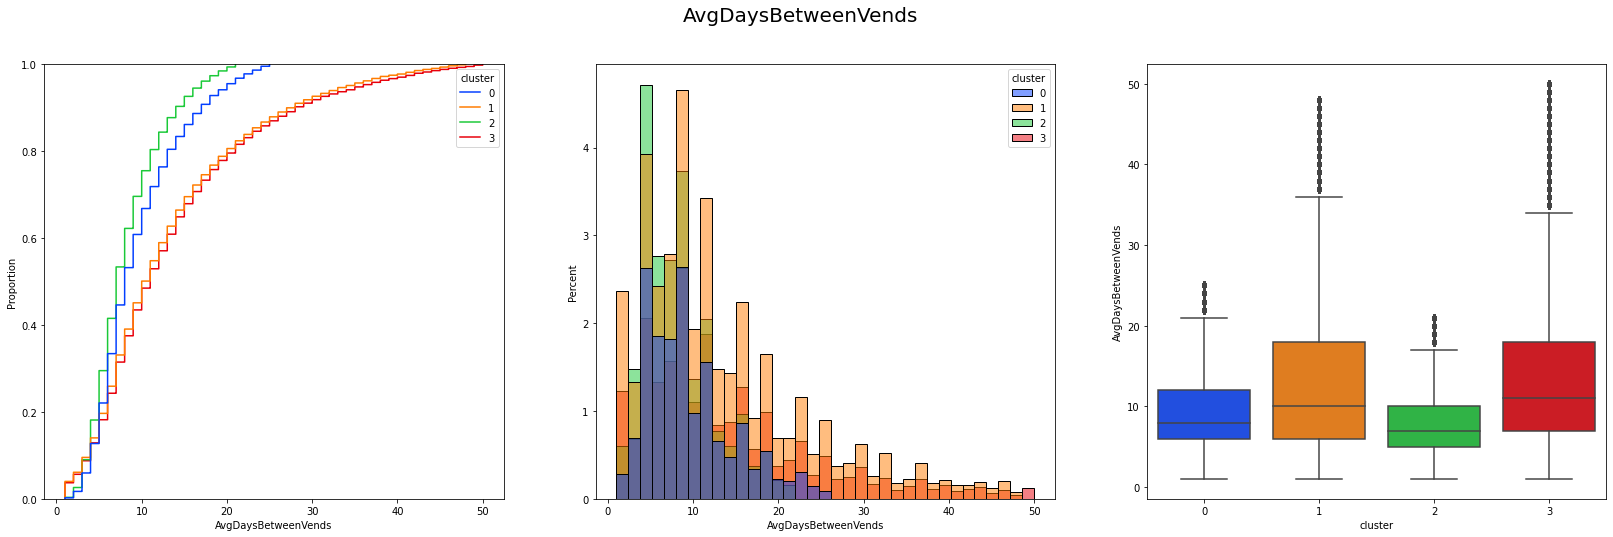

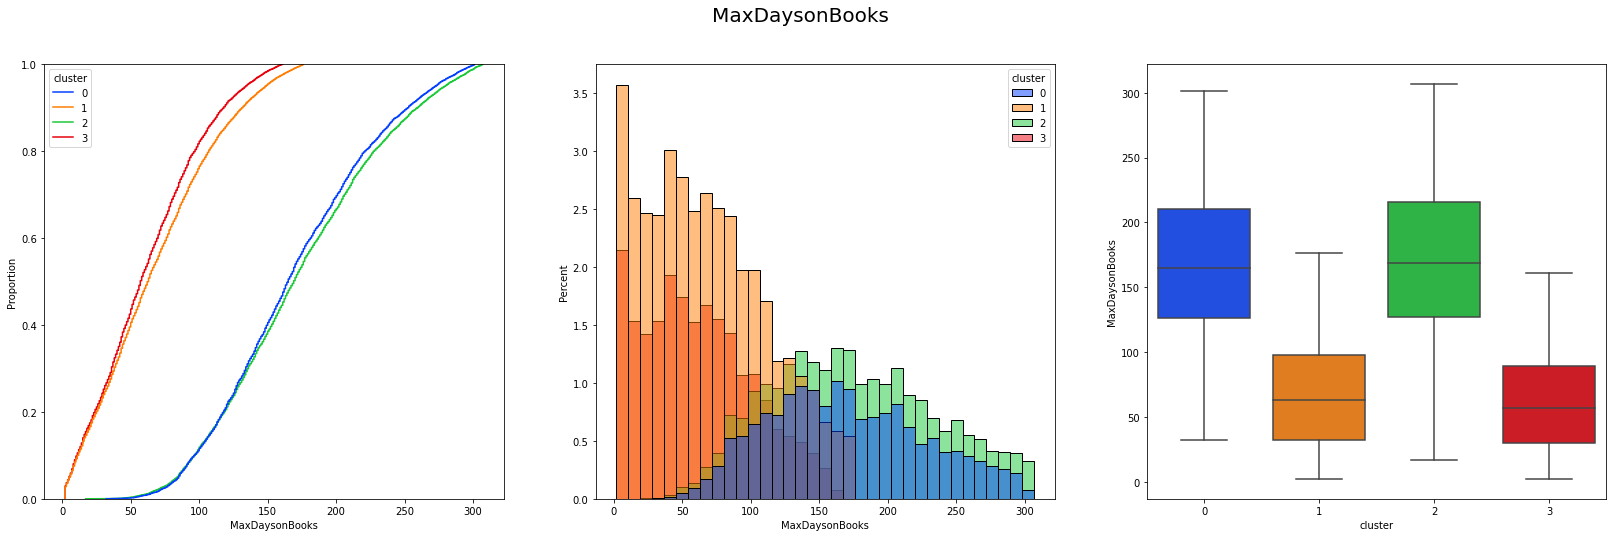

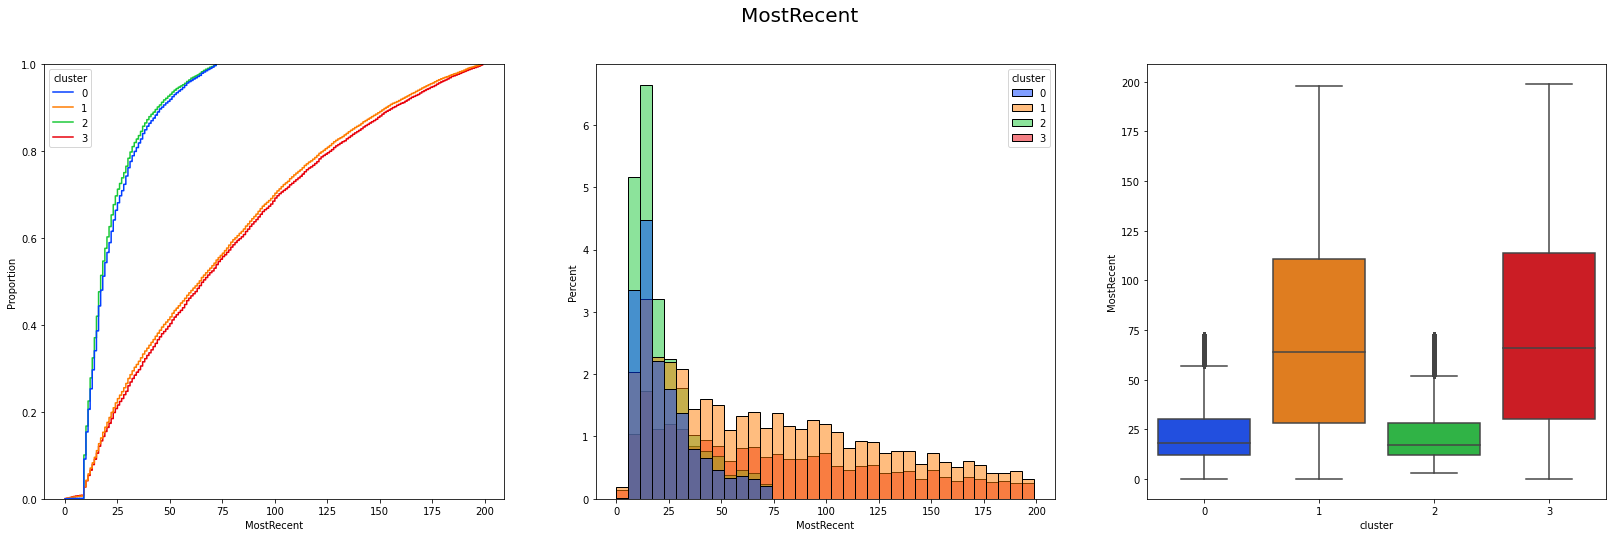

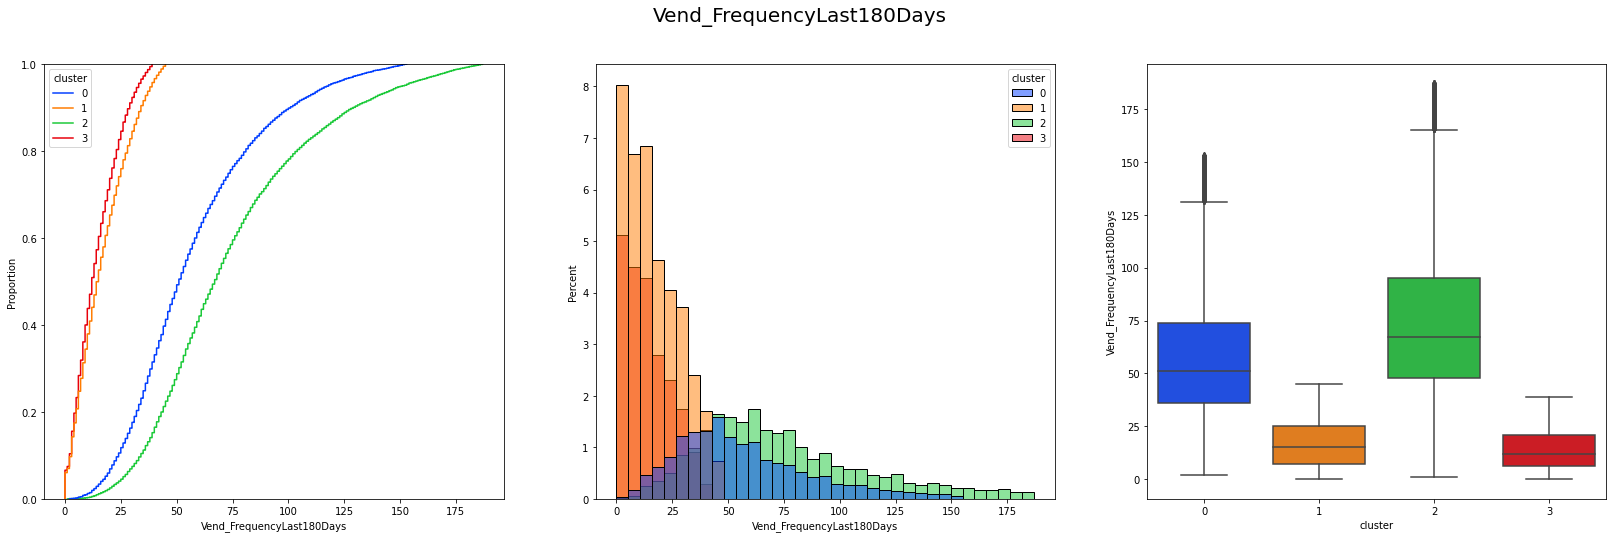

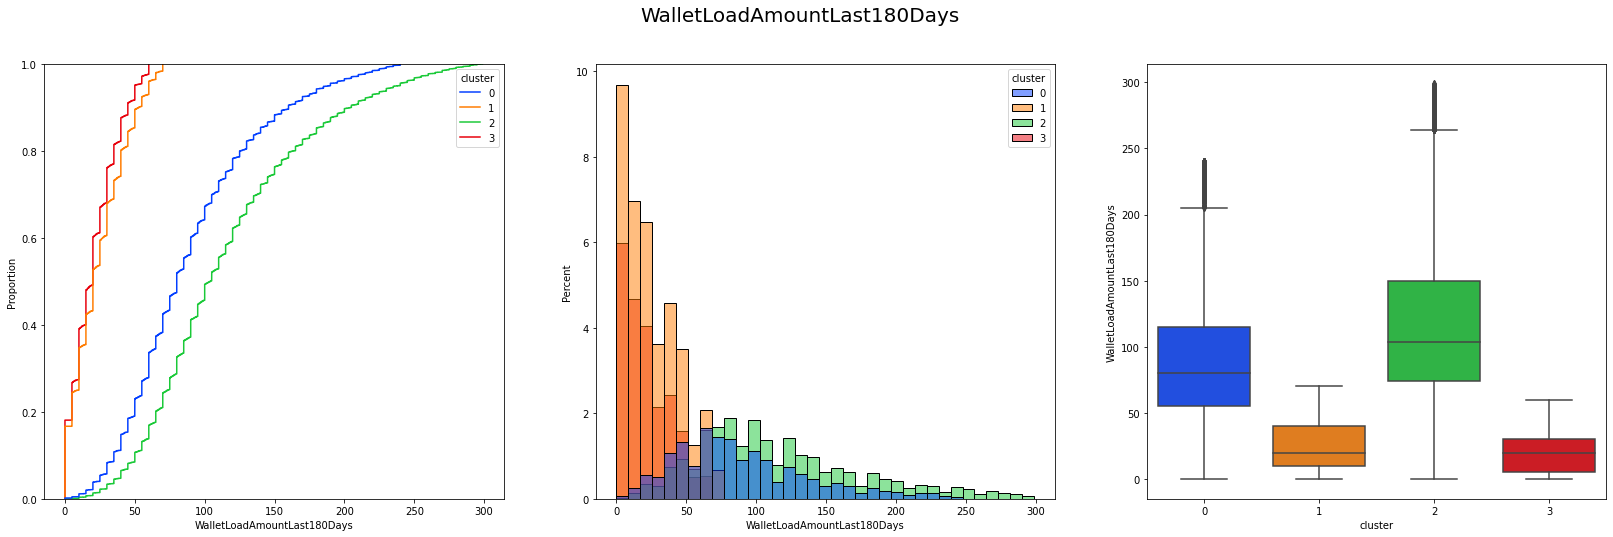

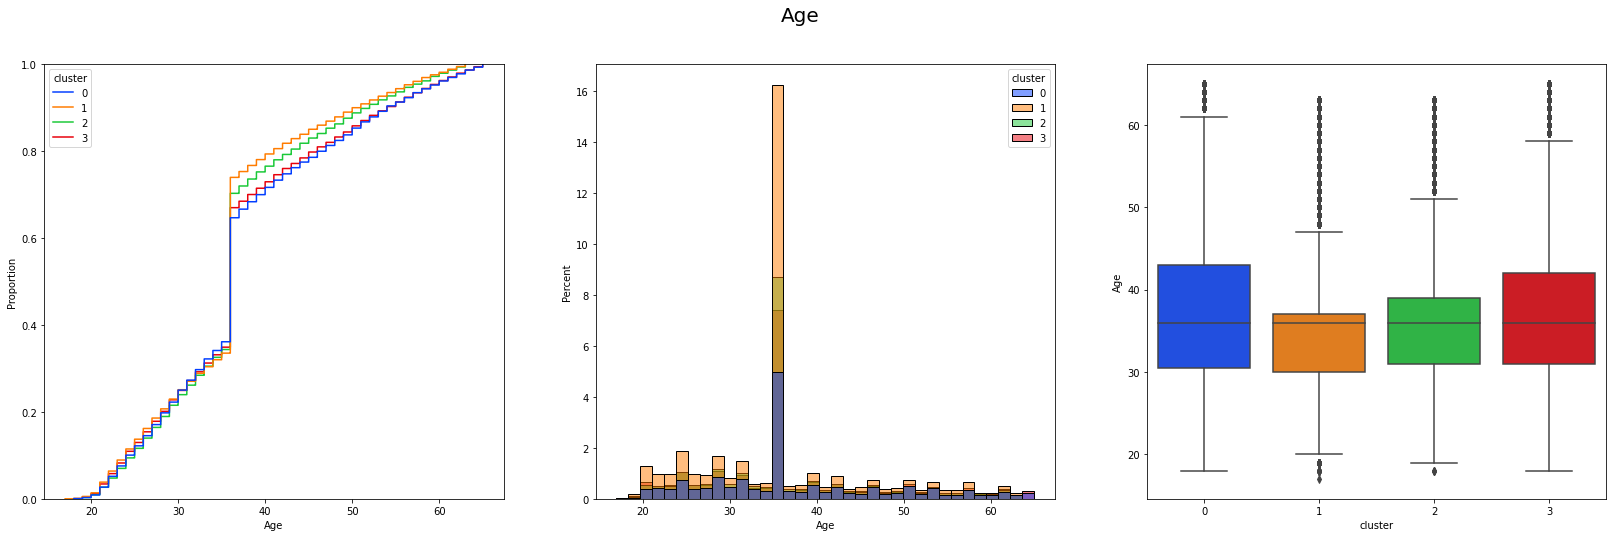

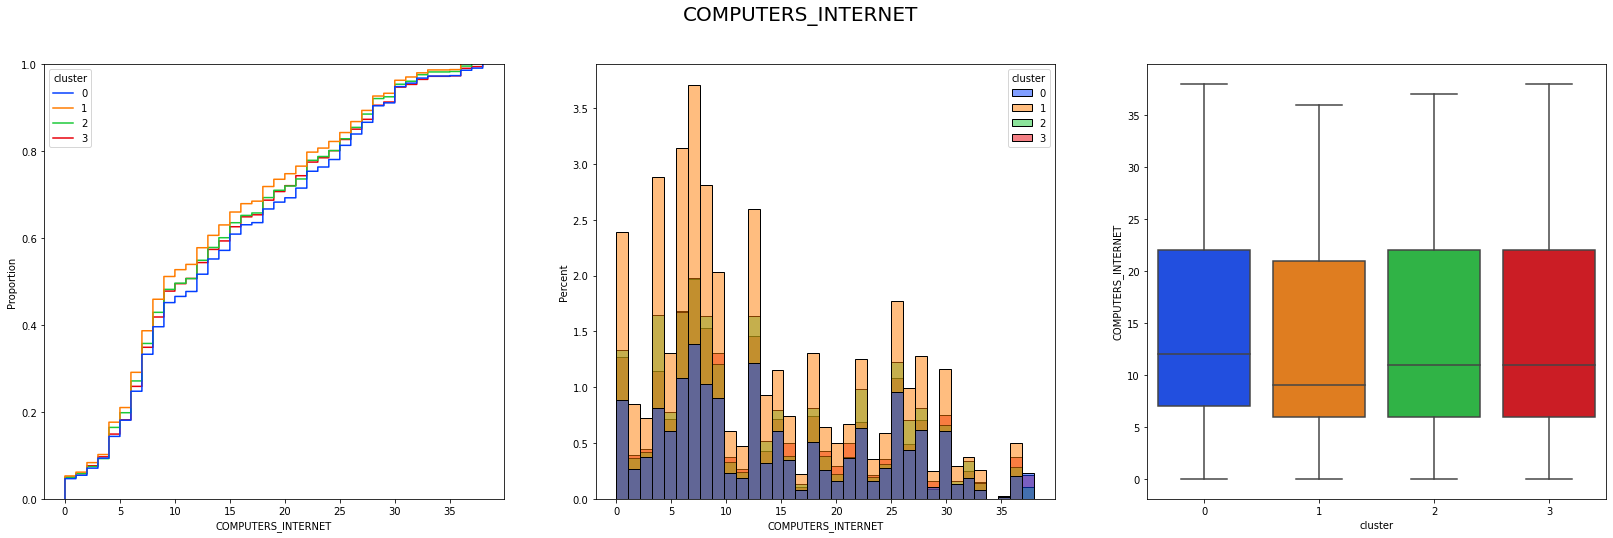

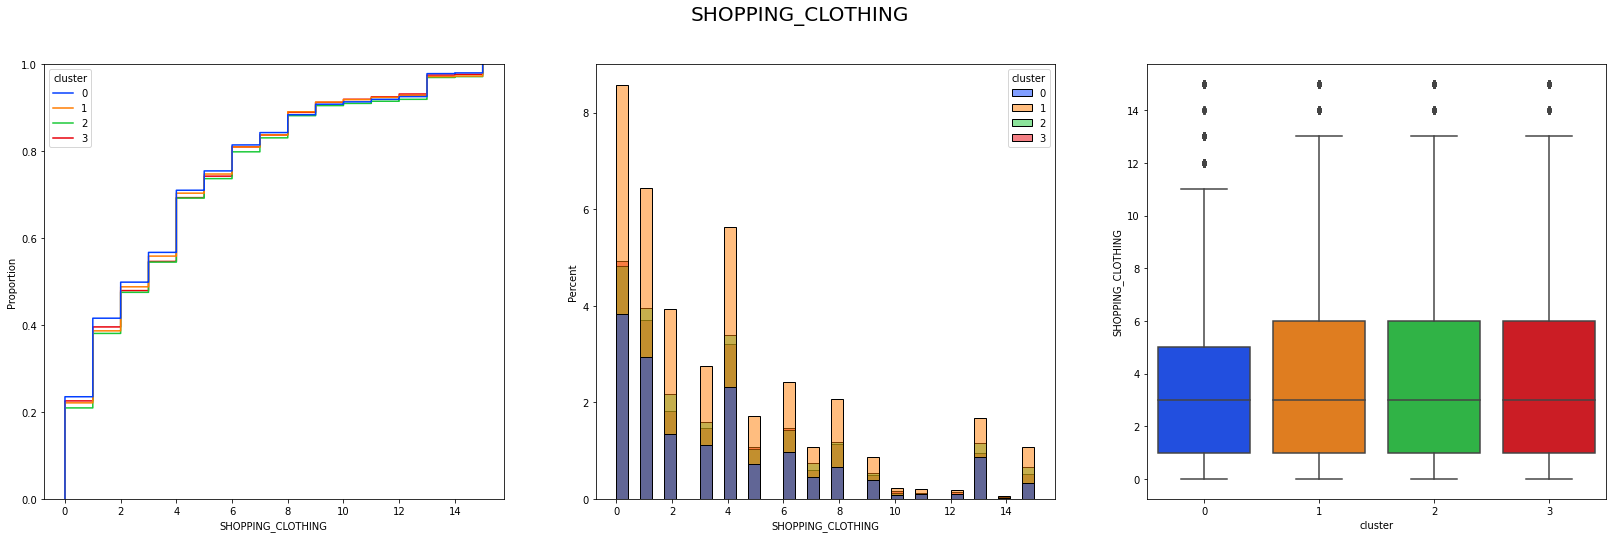

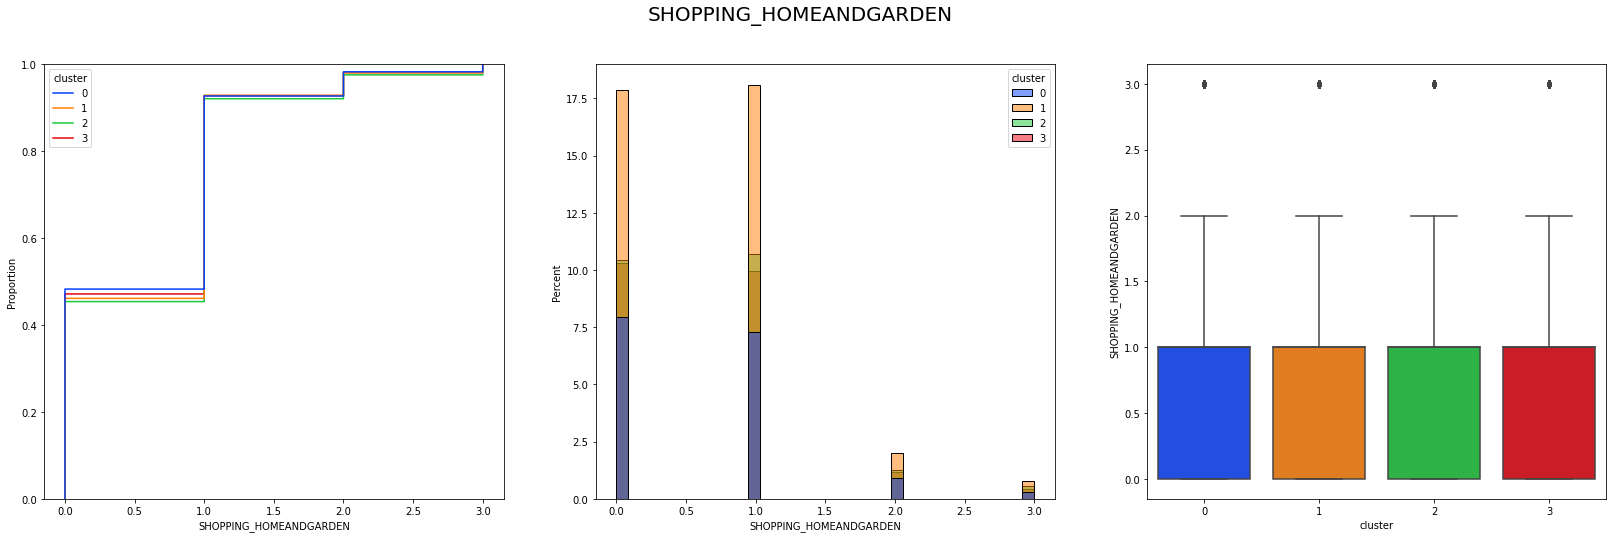

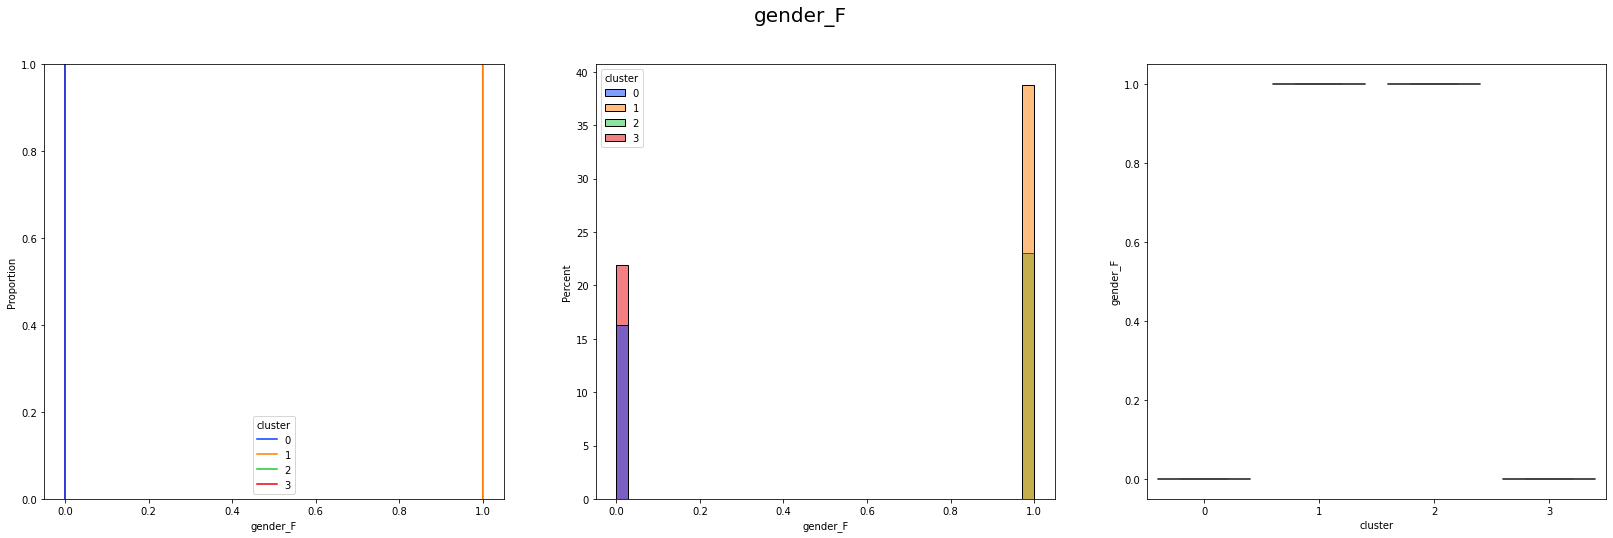

In [ ]:
for c in gcols:
  gf1= df1.loc[df1.flag=='train']
  gf2=gf1.groupby('cluster')[c].quantile(.95).reset_index()
  gf1= gf1.merge(gf2, how='inner', on= 'cluster', suffixes=('', '_y'))
  gf1=gf1.loc[gf1.loc[:,c] <= gf1.loc[:,c+'_y']]
  fig, axes = plt.subplots(1,3,figsize=(28,8), sharey= False)
  # gf2= df1.loc[df1.flag=='test']
  fig.suptitle(c, fontsize=20)
  sns.ecdfplot(gf1, x= c, ax=axes[0], hue= 'cluster', palette='bright')
  # sns.ecdfplot(gf2, x= c, ax=axes[1,0], hue= 'cluster', palette='bright')
  sns.histplot(gf1, x= c, ax=axes[1], hue= 'cluster', palette='bright', stat= 'percent', bins=35)
  # sns.histplot(gf2, x= c, ax=axes[1,1], hue= 'cluster', palette='bright')
  sns.boxplot(data=gf1, x= 'cluster', y=c, palette='bright')
  # sns.boxplot(gf2, x= c, ax=axes[1,1], hue= 'cluster', palette='bright')
  # fig.tight_layout()
  # fig.subplots_adjust(top=0.90)
  plt.show()
  # plt.close()